In [43]:
import pandas as pd
from matplotlib import pyplot as plt

In [44]:

#import malvern, need to select data range and data later on
pret = pd.read_csv('20200310.csv')
#before import remove % from headers from Retsch files.
#import csv file, change header number to get column headings as first row, for Retsch output = 24
r044=pd.read_csv('0-44_X_AREA.csv', header=24)

#find bounds and data from Malvern sheet, change Malv data into MM to match Retsch
bound1 = ((pret.iloc[1, 9:67])/1000)
data0442av = pret.iloc[8, 69:127]

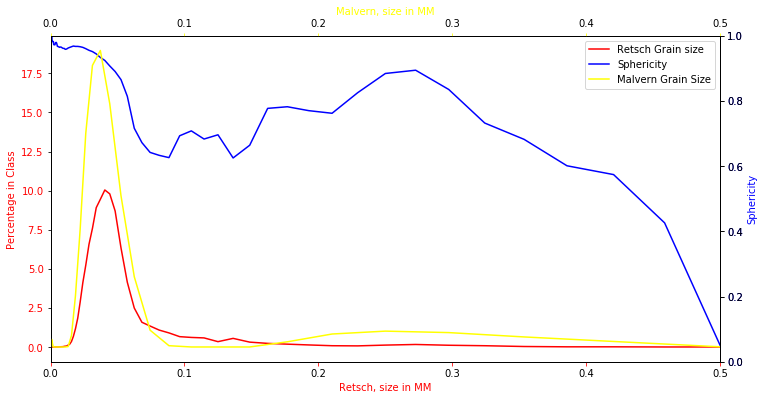

In [60]:

fig, ax_re = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)


ax_re.set_xlabel('Retsch, size in MM', color='red')
ax_re.tick_params(axis='x', color = 'red')
ax_re.set_ylabel('Percentage in Class', color ='red')
ax_re.tick_params(axis='y', labelcolor = 'red')
ax_re.plot(r044['Size'], r044['p3'], color ='red', label = 'Retsch Grain size')
ax_re.set_xlim(0,0.5)

ax_spht = ax_re.twinx()
ax_spht.set_xlim(0,0.5)
ax_spht.set_ylim(0,1)
ax_spht.set_ylabel('Sphericity', color='blue')
ax_spht.tick_params(axis='y', labelcolor = 'blue')
ax_spht.tick_params(axis='x', labelcolor = 'blue')
ax_spht.plot(r044['Size'], r044['SPHT3'], color='blue', label = 'Sphericity')

ax_ma = ax_re.twinx()
ax_ma = ax_re.twiny()
ax_ma.set_xlim(0,0.5)
ax_ma.set_xlabel('Malvern, size in MM', color='yellow')
ax_ma.tick_params(axis='x', color='yellow')
ax_ma.tick_params(axis='y', color='yellow')
ax_ma.plot(bound1, data0442av, color='yellow', label = 'Malvern Grain Size' )

#FOR EACH ADDITIONAL VARIABLE ADD LINESN, LABELSN TO BE INCLUDED IN LEGEND
lines, labels = ax_re.get_legend_handles_labels()
lines2, labels2 = ax_spht.get_legend_handles_labels()
lines3, labels3 = ax_ma.get_legend_handles_labels()
ax_spht.legend(lines + lines2 + lines3, labels + labels2 + labels3,  loc=1)

plt.savefig('comparison1.jpeg')
            